# Exploratory Analysis of House Attributes and House Sale Prices

## Objectives

* Exploratory Analysis of the raw downloaded data

## Inputs

* `house_prices_records.csv` data located at outputs/datasets/collection

## Outputs

* YData Report

## Imports and Setup

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from feature_engine.encoding import OneHotEncoder

---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues/jupyter_notebooks'

Set the parent of the current directory as the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues'

# Load Data

Load the `house_prices_records` data.

In [6]:
df = pd.read_csv('outputs/datasets/collection/house_prices_records.csv')
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration using Profile Report

In [7]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Analysis of Missing Observations

In [8]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Number of Missing Observations:")
print(missing)

Number of Missing Observations:
EnclosedPorch    1324
WoodDeckSF       1305
LotFrontage       259
GarageFinish      235
BsmtFinType1      145
BedroomAbvGr       99
2ndFlrSF           86
GarageYrBlt        81
BsmtExposure       38
MasVnrArea          8
dtype: int64


# Correlation of Numerical Variables with `SalePrice`

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()['SalePrice'].sort_values(key=abs, ascending=False)[1:]
print(corr)

OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
EnclosedPorch   -0.176458
BedroomAbvGr     0.161901
OverallCond     -0.077856
Name: SalePrice, dtype: float64


# Correlation Heatmap for Numerical Variables

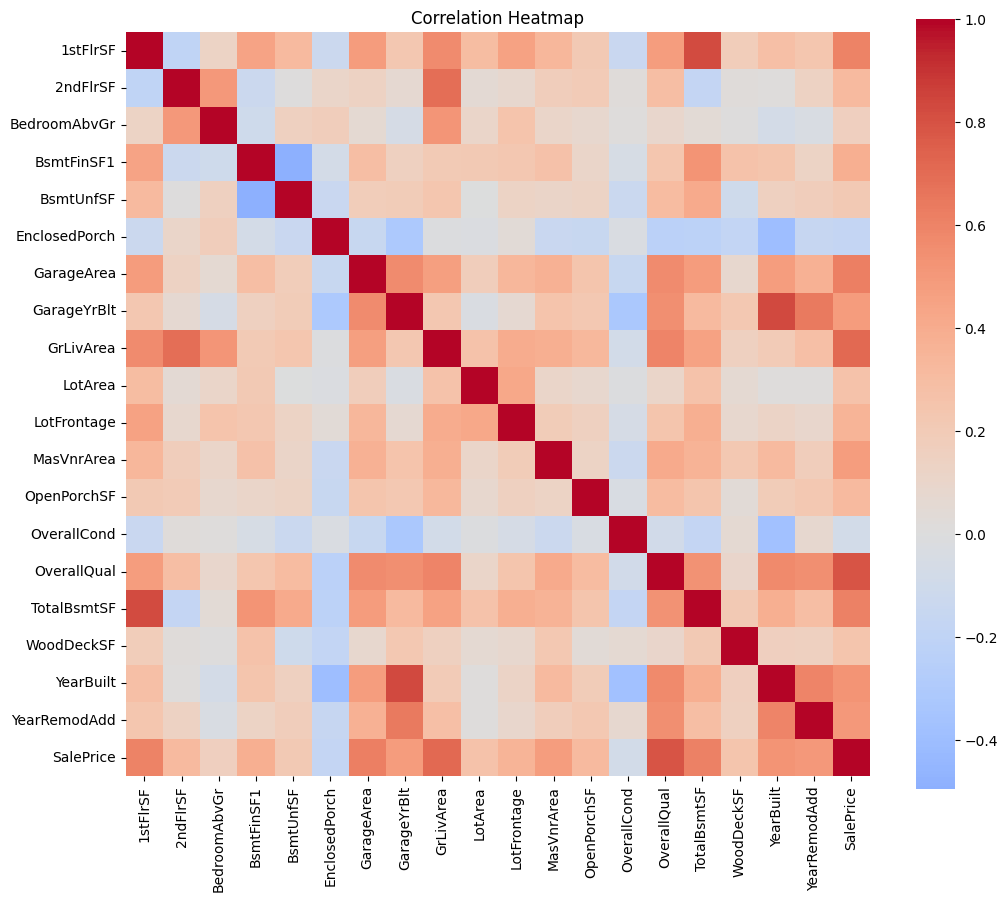

In [16]:
%matplotlib inline
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Histogram of `SalePrice`

The histograms will reveal the distributions of numerical variables, which will help decide the transformation to use in further analysis.  

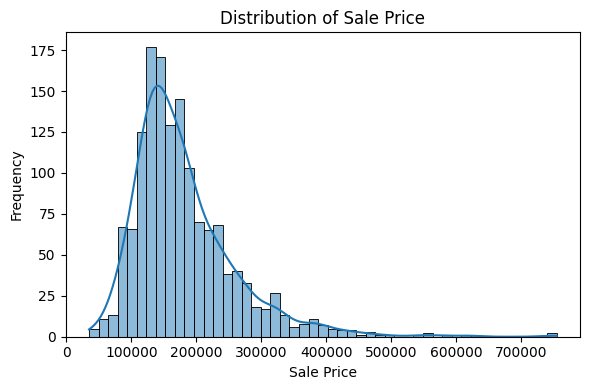

In [17]:
%matplotlib inline
plt.figure(figsize=(6, 4))
sns.histplot(df['SalePrice'], kde=True)
plt.title(f"Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Analysis for Categorical Variables

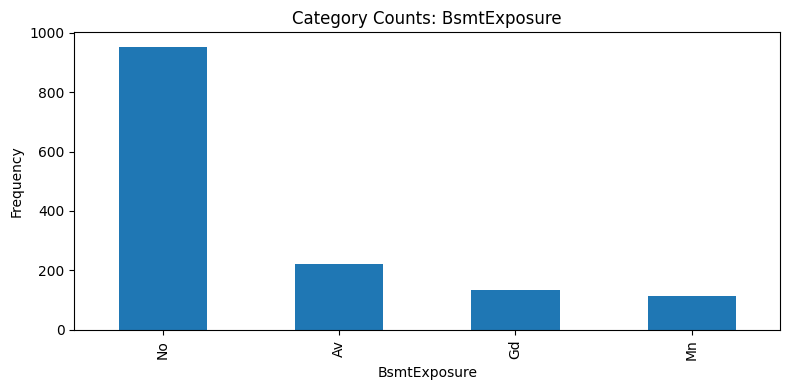

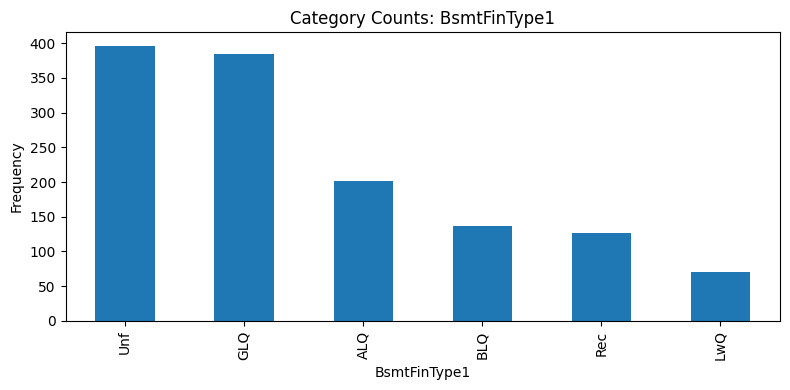

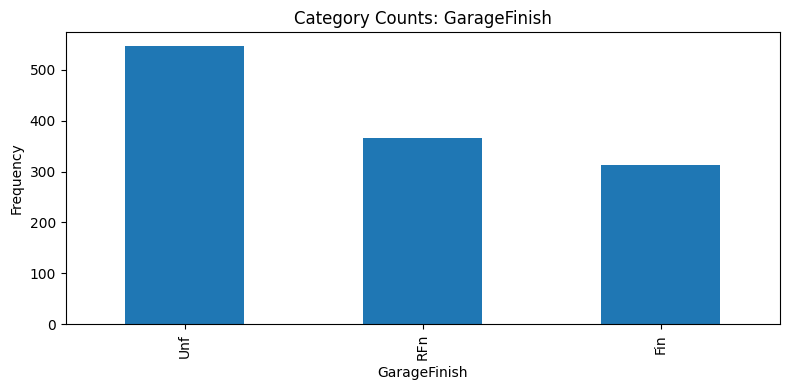

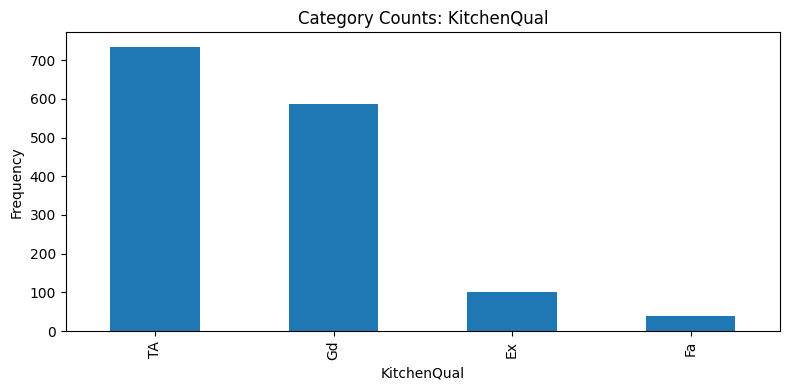

In [18]:
%matplotlib inline
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Category Counts: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Conclusions and Next Steps

* Next steps will be to modify the data with appropriate transformations for a more symmetric distribution of numerical variables
* Impute missing values, where possbile
* Transform some variables approprite to the content. For example, instead of looking at the first and second floor squarefeet, these two may be summed to look at the total squarefeet, in particular when there is very high level of missingess for the latter. 